# Applying Natural Languange Procesing on Yelp Customer Reviews

#### By Carlos Calix Woc

About 80% of the data companies analyze comes in unstructured formats, including video, images and text. Notably, I want to emphasize the importance of text-based data. Text messages, medical records, customer reviews, all of these different sources of data can allow companies to better understand their customer by leveraging the use of Natural Language Processing techniques. As a data scientist I thought necessary to develop these skills. 

Throughout this notebook, I analyzed [Yelp Dataset](https://www.kaggle.com/yelp-dataset/yelp-dataset), provided in a Kaggle competition. Some of the issues I tackled are the following:

- Run an exploratory analysis on the business with the highest number of reviews by building wordclouds.
- Create a machine learning model that can identify good and bad reviews based on the common words that are found in each review type

#### Literature Used:

- [Ultimate guide to deal with Text Data (using Python) By S. Jain (2018) – for Data Scientists and Engineers](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/)
- [Python for NLP: Sentiment Analysis with Scikit-Learn By U. Malik (2019)](https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/)
)
- [Generating WordClouds in Python by D. vu (2018)](https://www.datacamp.com/community/tutorials/wordcloud-python)




### Import the required basic libraries and datasets

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

reviews = pd.read_csv("yelp_review.csv")
yelp_business = pd.read_csv("yelp_business.csv")

### Understanding the datasets

In [115]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [116]:
reviews.describe()

,stars,useful,funny,cool
count,5.261668e+06,5.261668e+06,5.261668e+06,5.261668e+06
mean,3.727739e+00,1.385085e+00,5.091961e-01,5.860917e-01
std,1.433593e+00,4.528727e+00,2.686168e+00,2.233706e+00
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
max,5.000000e+00,3.364000e+03,1.481000e+03,1.105000e+03


In [117]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           object
text           object
useful         int64
funny          int64
cool           int64
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [118]:
yelp_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [119]:
yelp_business.describe()

,latitude,longitude,stars,review_count,is_open
count,174566.000000,174566.000000,174567.000000,174567.000000,174567.000000
mean,38.627312,-92.679009,3.632196,30.137059,0.840376
std,5.389012,26.240079,1.003739,98.208174,0.366258
min,-36.086009,-142.466650,1.000000,3.000000,0.000000
25%,33.631550,-112.125879,3.000000,4.000000,1.000000
50%,36.144257,-89.410128,3.500000,8.000000,1.000000
75%,43.606181,-79.657609,4.500000,23.000000,1.000000
max,89.999314,115.086769,5.000000,7361.000000,1.000000


In [120]:
yelp_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
business_id     174567 non-null object
name            174567 non-null object
neighborhood    68015 non-null object
address         174567 non-null object
city            174566 non-null object
state           174566 non-null object
postal_code     173944 non-null object
latitude        174566 non-null float64
longitude       174566 non-null float64
stars           174567 non-null float64
review_count    174567 non-null int64
is_open         174567 non-null int64
categories      174567 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


## Exploratory Data Analysis on Reviews

### Length of review varries according to review type

For faster processing, the dataset has been reduced. For low-star reviews, users type longer reviews in order to express their insatisfaction. It's a lot easier to see when we classify the reviews into good, bad and neutral. 

In [121]:
# Reduce sample for faster processing
review_sample = reviews.iloc[:10000]

Text(0, 0.5, 'Review Count')

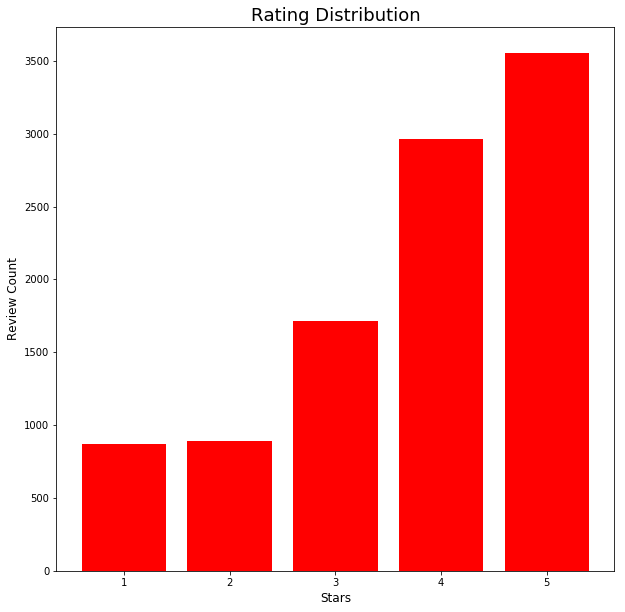

In [122]:
# Rating Distribution

plt.figure(figsize = (10,10))
sample = review_sample['stars'].value_counts()
plt.bar(sample.index, sample.values, color = 'red')
plt.title('Rating Distribution', fontsize = 18)
plt.xlabel('Stars', fontsize = 12)
plt.ylabel('Review Count', fontsize = 12)

C:\Users\cjc5n\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\cjc5n\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

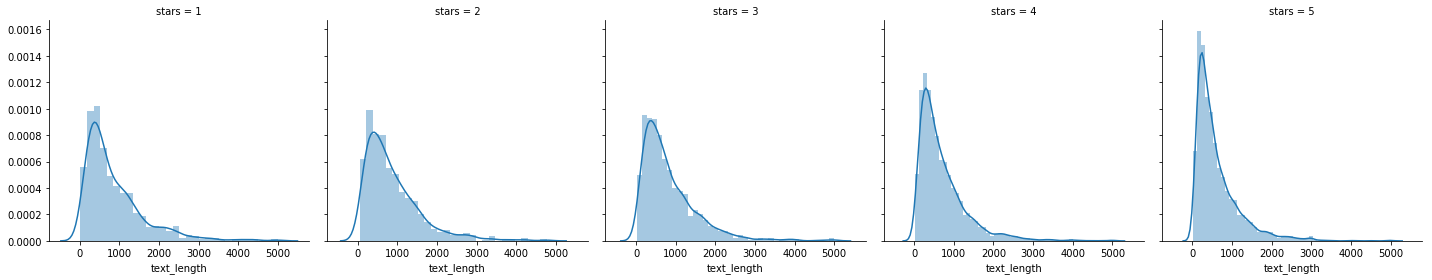

In [123]:
review_sample['text_length'] = review_sample['text'].apply(len)

plt.figure(figsize = (10,10))
rating = sns.FacetGrid(data = review_sample, col = 'stars', size = 4)
rating.map(sns.distplot, 'text_length')


### Preprocessing review types

In [124]:
# Set review type based on the number of stars given to each review
def set_review(x):
    if x <=2:
        return 0
    elif x == 3:
        return 1
    else:
        return 2

In [125]:
review_sample['Text length'] = review_sample['text'].apply(lambda x:len(x.split()))
review_sample['review_type'] = review_sample['stars'].apply(set_review)

C:\Users\cjc5n\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\cjc5n\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


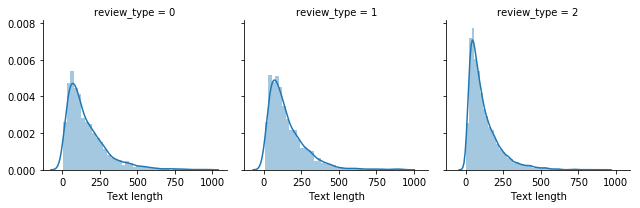

In [126]:
# Same concept as above, however it's clearer to see that lenght of review matters with review type
a = sns.FacetGrid(data = review_sample, col = 'review_type')
a.map(sns.distplot, 'Text length')

Text(0, 0.5, 'Text Length')

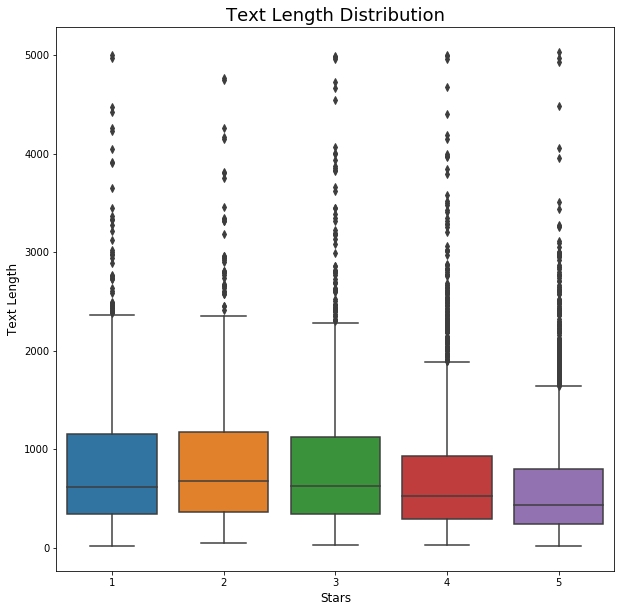

In [127]:
plt.figure(figsize = (10,10))
sns.boxplot(x='stars', y='text_length', data=review_sample)
plt.title('Text Length Distribution', fontsize = 18)
plt.xlabel('Stars', fontsize = 12)
plt.ylabel('Text Length', fontsize = 12)

### Exploring the high review businesses

#### Vegas is the city with the most Yelp activity

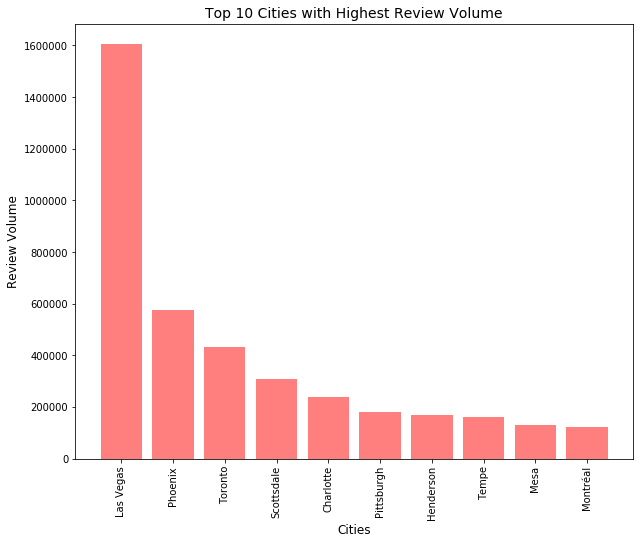

In [128]:
# What are the cities with the most reviews?

city = yelp_business.groupby('city')['review_count'].sum()
city = city.sort_values(ascending = False).iloc[:10]

f = plt.subplots(figsize=(10, 8))
ax = plt.bar(city.index, city.values, align = 'center', alpha = 0.5, color = 'red')
plt.xticks(rotation='vertical')
plt.xlabel('Cities', fontsize = 12)
plt.ylabel('Review Volume', fontsize = 12)
plt.title('Top 10 Cities with Highest Review Volume', fontsize = 14)
plt.show()


### Interesting enough, the businesses with with the most reviews are franchise restaurants

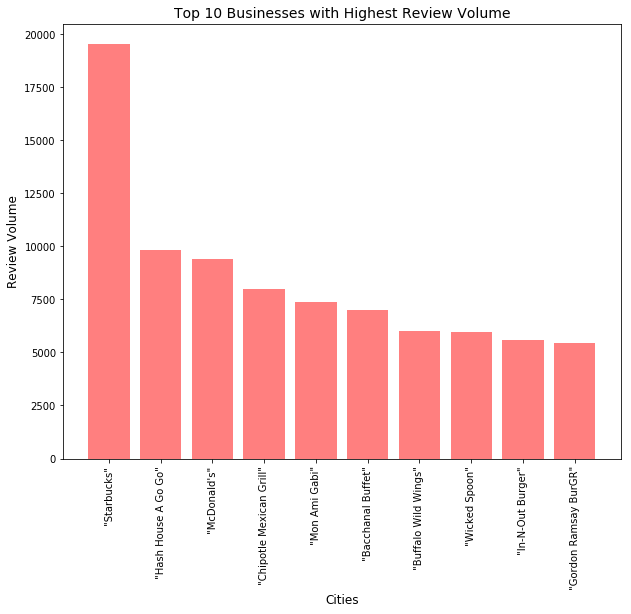

In [8]:
# What are the businesses with the most reviews?

businesses = yelp_business.groupby('name')['review_count'].sum()
businesses = businesses.sort_values(ascending = False).iloc[:10]

f = plt.subplots(figsize=(10, 8))
ax = plt.bar(businesses.index, businesses.values, align = 'center', alpha = 0.5, color = 'red')
plt.xticks(rotation='vertical')
plt.xlabel('Cities', fontsize = 12)
plt.ylabel('Review Volume', fontsize = 12)
plt.title('Top 10 Businesses with Highest Review Volume', fontsize = 14)
plt.show()


### 9 out of the 10 Starbucks with the highest review volume are in Vegas

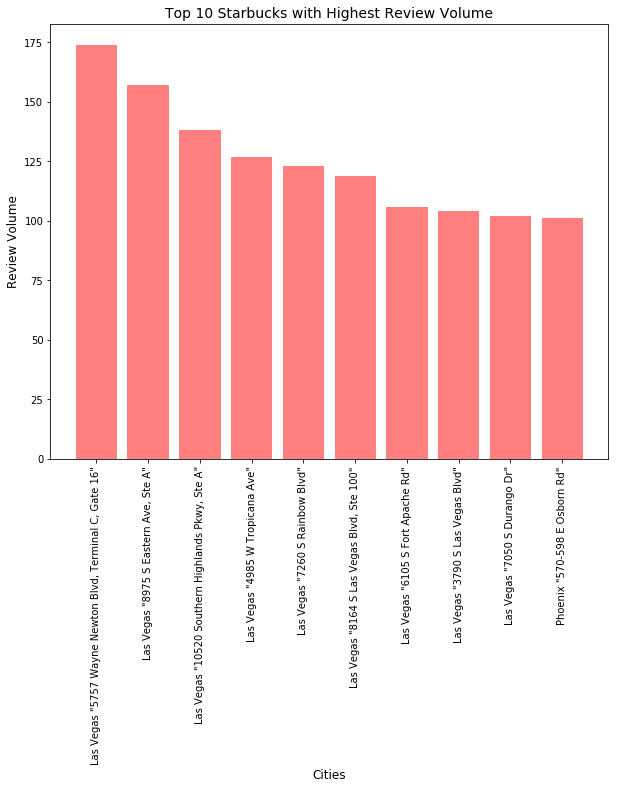

In [129]:
starbucks = yelp_business[yelp_business['name'].str.contains("Starbucks")]
starbucks = starbucks.sort_values(by = 'review_count', ascending = False).iloc[:10]
starbucks['Unique Address'] = starbucks[['city', 'address']].apply(lambda x: ' '.join(x), axis=1)

f = plt.subplots(figsize=(10, 8))
ax = plt.bar(starbucks['Unique Address'], starbucks.review_count, align = 'center', alpha = 0.5, color = 'red')
plt.xticks(rotation='vertical')
plt.xlabel('Cities', fontsize = 12)
plt.ylabel('Review Volume', fontsize = 12)
plt.title('Top 10 Starbucks with Highest Review Volume', fontsize = 14)
plt.show()

## Exploring the Common Words in Starbucks Reviews

In [130]:
# Take business ids of the top 10 Starbucks and search for all their respectie reviews 
starbucks_reviews = reviews[reviews['business_id'].isin(['S5RLqt9XkvZxoTMKXuF-MA', 'YzuWj3u9BZRpxNmd1Cv3QA', 'szL4LjaGZpmsLjQ5ALmaQA', 'RDw-K8fjs5Mporlq2KqTUg', '7HIa2lYy5jgcZuADlRjKSg',
'vIAEWbTJc657yN8I4z7whQ', 'KvFjvYiagu-9YmcJbLd3Ew', 'JxKWfZ6hG8iRnK8QL65jTw', 'GG9VcABDC1hDFnjVi6q5Fw','GqlcI-T5pK17Q932PimsAg'])]

### Remove stopwords and punctuation

In [131]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def text_process(text):
    
    removed_punctuation = [char for char in text if char not in string.punctuation]
    removed_punctuation = ''.join(removed_punctuation)
    parsed_words = [word for word in removed_punctuation.split() if word.lower() not in stopwords.words('english')]
   
    return parsed_words


In [132]:
starbucks_reviews['review_type'] = starbucks_reviews['stars'].apply(set_review)

C:\Users\cjc5n\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
# Store positive and negative reviews
sb_review_pos = starbucks_reviews[starbucks_reviews['review_type'] == 2]
sb_review_neg = starbucks_reviews[starbucks_reviews['review_type'] == 0]

In [135]:
# Clean text and transform dataframe to bag of words
sb_pos_bw = text_process(sb_review_pos['text'])
sb_neg_bw = text_process(sb_review_neg['text'])

In [136]:
sb_pos_bw = ' '.join(sb_pos_bw)
sb_neg_bw = ' '.join(sb_neg_bw)

### Positive Reviews

(-0.5, 499.5, 499.5, -0.5)

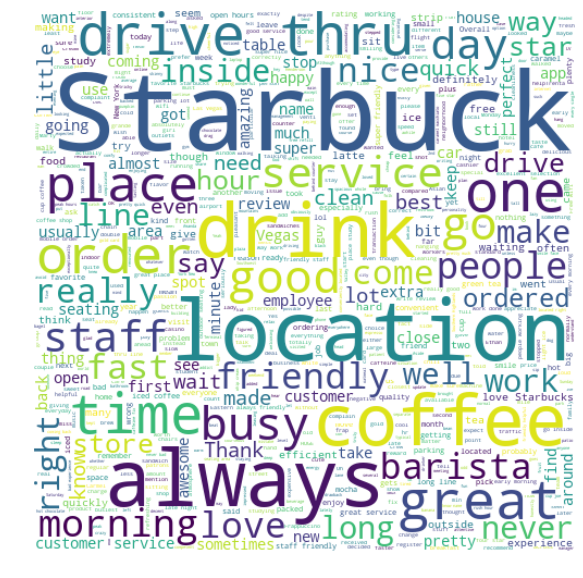

In [137]:
# Wordcloud for Positive Starbucks Reviews
wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white", width = 500, height = 500).generate(sb_pos_bw)
plt.figure(figsize = (25,10))
plt.imshow(wordcloud, interpolation = 'bilinear' )
plt.axis("off")


### Negative Reviews

(-0.5, 499.5, 499.5, -0.5)

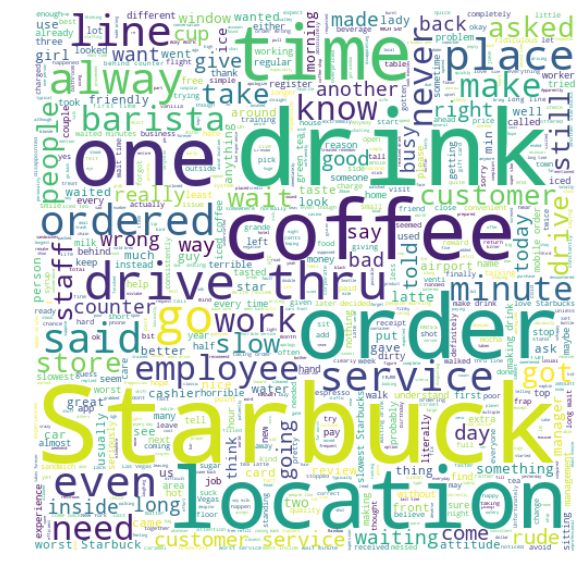

In [139]:
# Wordcloud for Negative Starbucks Reviews
wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white", width = 500, height = 500).generate(sb_neg_bw)
plt.figure(figsize = (25,10))
plt.imshow(wordcloud, interpolation = 'bilinear' )
plt.axis("off")


## Apply Machine Learning Algorithms to Classify Reviews

### Import necessary models and vectorize words

In [140]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix


# Split the data for ML model

x = review_sample['text']
y = review_sample['review_type']

# Get word count
cv_transformer = CountVectorizer(analyzer = text_process)
x = cv_transformer.fit_transform(x)

### Function to apply multiple classification algorithms

In [141]:
def classify_model(x, y):
    
    classifiers = [

        KNeighborsClassifier(3),
        svm.SVC(probability=True),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        MultinomialNB(),
        GradientBoostingClassifier(),
        LogisticRegression()]

    classification = pd.DataFrame(columns =["Classifier", "Accuracy"])
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, 
                                                    random_state=1) 
    accuracy_dict = {}
    for clf in classifiers:
        clf_name = clf.__class__.__name__

        clf.fit(x_train,y_train)
        predict= clf.predict(x_test)
        accuracy = round(accuracy_score(y_test,predict) *100,2)
        if clf_name in accuracy_dict:
            accuracy_dict[clf_name]+=accuracy
        else:
            accuracy_dict[clf_name]=accuracy
        
    classification['Classifier'] =  accuracy_dict.keys()
    classification['Accuracy'] = accuracy_dict.values()
    
    return classification

In [143]:
print("Results:")
print(classify_model(x,y))

Results:


C:\Users\cjc5n\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cjc5n\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cjc5n\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cjc5n\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


                   Classifier  Accuracy
0        KNeighborsClassifier     63.92
1                         SVC     65.12
2      DecisionTreeClassifier     62.12
3      RandomForestClassifier     68.20
4          AdaBoostClassifier     71.53
5               MultinomialNB     71.62
6  GradientBoostingClassifier     71.35
7          LogisticRegression     74.88


In [144]:
# Calculate confusion matrix for Logistic Regression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, 
                                                    random_state=1) 

mnb = LogisticRegression()
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 409  115  192]
 [ 108  215  356]
 [  62  172 2371]]


              precision    recall  f1-score   support

           0       0.71      0.57      0.63       716
           1       0.43      0.32      0.36       679
           2       0.81      0.91      0.86      2605

   micro avg       0.75      0.75      0.75      4000
   macro avg       0.65      0.60      0.62      4000
weighted avg       0.73      0.75      0.73      4000



### Conclusions

- Logistic Regression provides the highest accuracy with a 74.88%. It provides better results that Multinomial Naive Bayes (71.63%), which normally yields good results in text-based classification given its independence assumption among the predictor variables.
- Franchises have the highest number of reviews. This makes sense since they have more locations across the globe. 
- Starbucks for instance has the most reviews. Good reviews include words related to their service and drinks such as quick, fast, good, best, etc.
Bad reviews include words criticizing their service such as terrible, bad, wrong, etc.